# Project 02 - Image Processing

## Student Information

- Full name: Lê Nguyễn Nhật Khánh
- Student ID: 23127206
- Class: 23CLC04

## Required Libraries

In [1]:
# IMPORT YOUR LIBS HERE
import numpy as npy
import matplotlib.pyplot as plt
from PIL import Image

## Function Definitions

In [2]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''
    img = Image.open(img_path).convert('RGB')
    return img

def show_img(img):
    '''
    Show image on the screen

    Parameters
    ----------
    img : npy.array
        Image
    '''
    # if the image is gray scale
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img.astype(npy.uint8))
    plt.axis('off')
    plt.show()

def save_img(img, name, spec = ""):
    '''
    Save image to folder which have this file .ipynb

    Parameters
    ----------
    img: npy.array
        Image
    name: string
        Name of image
    spec: string
        name of feature like "_blur"
    '''
    #Find the only name, extension and make new name for image with spec
    last_dot = name.rfind('.')
    if last_dot != -1:
        name_only = name[:last_dot]
        extension = name[last_dot+1:]
        image_ouput_path = name_only + '_' + spec + '.' + extension
    else:
        image_ouput_path = name + '_' + spec + '.png'
        extension = 'png'

    if extension == 'jpg': extension = 'jpeg'
    img_final = Image.fromarray(img.astype(npy.uint8))
    img_final.save(image_ouput_path, extension.upper())

def adjust_brightness(img, val = 40):
    '''
    Adjust the brightness of the picture

    Parameters
    ----------
    img: npy.array
        Image
    val: int
        the val which we need to increase
        
    Returns
    -------
        npy.array
    '''
    return npy.clip(img.astype(npy.int16) + val, 0, 255).astype(npy.uint8)
    
def adjust_contrast(img, val = 1.4):
    '''
    Adjust the constrast of the picture

    Parameters
    ----------
    img: npy.array
        Image
    val: int
        the val which we need to increase
        
    Returns
    -------
        npy.array
    '''
    if val == 0: return img
    
    #normalize -> minus 0.5 -> the image will be -0.5 to 0.5 
    #multi val -> plus 0.5 to return and multi 255 to return the new image
    img_float = img.astype(npy.float32) / 255.0
    img_float = (img_float - 0.5) * val + 0.5
    img_final = npy.clip(img_float * 255.0, 0, 255).astype(npy.uint8)
    return img_final
    
def flip_image(img):
    '''
    Flip the image in both vertical and horizontal

    Parameters
    ----------
    img: npy.array
        Image
        
    Returns
    -------
        image_vertical, image_horizontal: npy.array
    '''
    vertical_flip = img[::-1, :, :]
    horizontal_flip = img[:, ::-1, :]
    return horizontal_flip, vertical_flip
    
def convert_to_grayscale(img):
    '''
    Convert the image into grayscale

    Parameters
    ----------
    img: npy.array
        Image
        
    Returns
    -------
        npy.array
    '''
    #Take RGB from img
    img_grayscale = npy.dot(img[..., :3], [0.299, 0.587, 0.114])
    return img_grayscale.astype(npy.uint8)

def convert_to_sepia(img):
    '''
    Convert the image into sepia

    Parameters
    ----------
    img: npy.array
        Image
        
    Returns
    -------
        npy.array
    '''
    img = img.astype(npy.float32)
    sepia_filter = npy.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])
    sepia_img = img @ sepia_filter.T
    sepia_img = npy.clip(sepia_img, 0, 255).astype(npy.uint8)
    return sepia_img

def apply_blur(img):
    '''
    Apply blur to the image

    Parameters
    ----------
    img: npy.array
        Image
        
    Returns
    -------
        npy.array
    '''
    kernel = npy.array([
        [1,  4,  6,  4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1,  4,  6,  4, 1]
    ], dtype=npy.float32)
    kernel /= 256
    
    h, w, d = img.shape
    kh, kw = kernel.shape
    pad = kh // 2
    
    #make a new image with padding
    img_temp = npy.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='reflect').astype(npy.float32)
    
    img_blur = npy.zeros_like(img).astype(npy.float32)
    
    #three kernel: RGB
    for c in range(3):
        for i in range(h):
            for j in range(w):
                #take the small matrix and calculate the result
                region = img_temp[i:i + kh, j:j + kw, c]
                img_blur[i, j, c] = npy.sum(region * kernel)

    return npy.clip(img_blur, 0, 255).astype(npy.uint8)

def apply_sharpen(img):
    '''
    Apply sharpen to the image

    Parameters
    ----------
    img: npy.array
        Image
        
    Returns
    -------
        npy.array
    '''
    kernel = npy.array([
        [0, -1,  0],
        [-1, 5, -1],
        [0, -1,  0]
    ], dtype=npy.int16)
    
    h, w, d = img.shape
    kh, kw = kernel.shape
    pad = kh // 2
    
    #make new image with padding
    img_temp = npy.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='reflect').astype(npy.int16)
    
    img_sharp = npy.zeros_like(img).astype(npy.int16)
    
    #three kernel: RGB
    for c in range(3):
        for i in range(h):
            for j in range(w):
                #take the small matrix and calculate the result
                region = img_temp[i:i + kh, j:j + kw, c]
                img_sharp[i, j, c] = npy.sum(region * kernel)
                
    return npy.clip(img_sharp, 0, 255).astype(npy.uint8)
    
def crop_14_from_center(img):
    '''
    Crop image with 1/4 size from center

    Parameters
    ----------
    img: npy.array
        Image
        
    Returns
    -------
        npy.array
    '''
    height, width = img.shape[:2]
    
    start_x = width // 4
    end_x = start_x + width // 2
    start_y = height // 4
    end_y = start_y + height // 2
    
    cropped_img = img[start_y:end_y, start_x:end_x]
    return cropped_img
    
def crop_to_circle(img):
    '''
    Crop image into circle shape

    Parameters
    ----------
    img: npy.array
        Image
        
    Returns
    -------
        npy.array
    '''
    n, _, dim = img.shape
    center_x, center_y = n // 2, n // 2
    r = n // 2
    
    #Make matrix mask with value is true or false
    Y, X = npy.ogrid[:n, :n]
    mask = (X - center_x)**2 + (Y - center_y)**2 <= r**2
    
    #Make a black picture same with original image
    masked_img = npy.zeros_like(img)
    
    masked_img[mask] = img[mask]
    return masked_img.astype(npy.uint8)
    
def crop_to_ellip(img):
    '''
    Crop image into two ellip shape

    Parameters
    ----------
    img: npy.array
        Image
        
    Returns
    -------
        npy.array
    '''
    n, _, dim = img.shape
    center_X = n // 2
    center_Y = n // 2
    
    #take the a, b of ellip according to n
    a = ((1.414/2)*0.875)*n
    b = (n * 1.414) / 4
    
    #Create coordinate grid for the image and shilf to center of the picture
    Y, X = npy.ogrid[:n, :n]
    x_shift = X - center_X
    y_shift = Y - center_Y
    
    #Rotate 45 degree
    u = (x_shift + y_shift) / npy.sqrt(2)
    v = (-x_shift + y_shift) / npy.sqrt(2)
    
    #Create ellip mask
    mask1 = (u**2) / (a**2) + (v**2) / (b**2) <= 1
    mask2 = (u**2) / (b**2) + (v**2) / (a**2) <= 1
    mask = mask1 | mask2
    
    ellip_img = npy.zeros_like(img)
    ellip_img[mask] = img[mask]
    
    return ellip_img.astype(npy.uint8)
    
def process_image(img, name, choice):
    '''
    Call function

    Parameters
    ----------
    img: npy.array
        Image
    name: string
        Name of the image
    choice: int
        Choice of user
    '''
    match choice:
        case 0:
            print("\nOriginal photo")
            show_img(img)
            
            print("1. After adjust brightness")
            img_after_brightness = adjust_brightness(img)
            show_img(img_after_brightness)
            
            print("2. After adjust constrast")
            img_after_constrast = adjust_contrast(img)
            show_img(img_after_constrast)
            
            print("3. After flip image")
            img_after_horizontal, img_after_vertical = flip_image(img)
            print("a. Horizontal")
            show_img(img_after_horizontal)
            print("b. Vertical")
            show_img(img_after_vertical)
            
            print("4. After convert image")
            print("a. Grayscale")
            img_after_gray = convert_to_grayscale(img)
            show_img(img_after_gray)
            print("b. Sepia")
            img_after_sepia = convert_to_sepia(img)
            show_img(img_after_sepia)
            
            print("5. Apply blur and sharpen image")
            print("a. Blur")
            img_after_blur = apply_blur(img)
            show_img(img_after_blur)
            print("b. Sharpen")
            img_after_sharpen = apply_sharpen(img)
            show_img(img_after_sharpen)
            
            print("6. Crop image 1/4 from center")
            img_after_crop = crop_14_from_center(img)
            show_img(img_after_crop)
            
            print("7. Crop image")
            print("a. Circle")
            img_after_circle = crop_to_circle(img)
            show_img(img_after_circle)
            print("b. Ellip")
            img_after_ellip = crop_to_ellip(img)
            show_img(img_after_ellip)
            
            #save all image
            save_img(img_after_brightness, name, "brightness")
            save_img(img_after_constrast, name, "contrast")
            save_img(img_after_horizontal, name, "flip_hor")
            save_img(img_after_vertical, name, "flip_ver")
            save_img(img_after_gray, name, "gray")
            save_img(img_after_sepia, name, "sepia")
            save_img(img_after_blur, name, "blur")
            save_img(img_after_sharpen, name, "sharpen")
            save_img(img_after_crop, name, "crop_1_4_center")
            save_img(img_after_circle, name, "circle")
            save_img(img_after_ellip, name, "ellip")
        case 1:
            print("Positive for increase and negative for decrease")
            val = int(input("Enter an integer number: "))
            print("\nOriginal photo")
            show_img(img)
            img_after = adjust_brightness(img, val)
            print("Final image")
            show_img(img_after)
            save_img(img_after, name, "brightness")
        case 2:
            print("Positive for increase and negative for decrease")
            val = float(input("Enter an float number: "))
            print("\nOriginal photo")
            show_img(img)
            img_after = adjust_contrast(img, val)
            print("Final image")
            show_img(img_after)
            save_img(img_after, name, "contrast")
        case 3:
            print("\nOriginal photo")
            show_img(img)
            img_after_horizontal, img_after_vertical = flip_image(img)
            print("Final image (Horizontal)")
            show_img(img_after_horizontal)
            print("Final image (Vertical)")
            show_img(img_after_vertical)
            save_img(img_after_horizontal, name, "flip_hor")
            save_img(img_after_vertical, name, "flip_ver")
        case 4:
            print("\nOriginal photo")
            show_img(img)
            img_after_gray = convert_to_grayscale(img)
            print("Grayscale")
            show_img(img_after_gray)
            img_after_sepia = convert_to_sepia(img)
            print("Sepia")
            show_img(img_after_sepia)
            save_img(img_after_gray, name, "gray")
            save_img(img_after_sepia, name, "sepia")
        case 5:
            print("\nOriginal photo")
            show_img(img)
            img_after_blur = apply_blur(img)
            print("Apply blur")
            show_img(img_after_blur)
            img_after_sharpen = apply_sharpen(img)
            print("Apply sharpen")
            show_img(img_after_sharpen)
            save_img(img_after_blur, name, "blur")
            save_img(img_after_sharpen, name, "sharpen")
        case 6:
            print("\nOriginal photo")
            show_img(img)
            img_after = crop_14_from_center(img)
            print("Final image")
            show_img(img_after)
            save_img(img_after, name, "crop_1_4_center")
        case 7:
            print("\nOriginal photo")
            show_img(img)
            img_after_circle = crop_to_circle(img)
            print("Circle")
            show_img(img_after_circle)
            img_after_ellip = crop_to_ellip(img)
            print("Ellip")
            show_img(img_after_ellip)
            save_img(img_after_circle, name, "circle")
            save_img(img_after_ellip, name, "ellip")

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

## Main FUNCTION

In [3]:
def main():
    '''
    Purpose: take the picture from local, call to process function and return the result
    '''
    #take path of picture
    print('Example: /home/userA/Downloads/image_processing/photo.png')
    print('Or just enter the name if the photo is the same level with this file.\nExample: photo.png')
    image_path = input('\nEnter path of image: ')
    
    #read image and return to numpy array
    img = read_img(image_path)
    image_npy = npy.array(img)
    
    #take name of this photo
    last_slash = image_path.rfind('/')
    file_name_with_ext = image_path[last_slash + 1:]
    
    #Menu
    print("\n---IMAGE PROCESSING MENU---")
    print("0. Do all functions")
    print("1. Increase/Decrease brightness")
    print("2. Adjust contrast")
    print("3. Flip image (Horizontal and Vertical)")
    print("4. Convert to grayscale and sepia")
    print("5. Apply blur and sharpen image")
    print("6. Crop image 1/4 from center")
    print("7. Crop image with circle and ellip")
    choice = int(input("Enter your choice: "))
    while choice < 0 or choice > 7:
        choice = int(input("Please choose again: "))
        
    #call funtion to solve the request
    process_image(image_npy, file_name_with_ext, choice)

Example: /home/userA/Downloads/image_processing/photo.png
Or just enter the name if the photo is the same level with this file.
Example: photo.png



Enter path of image:  Lenna.png



---IMAGE PROCESSING MENU---
0. Do all functions
1. Increase/Decrease brightness
2. Adjust contrast
3. Flip image (Horizontal and Vertical)
4. Convert to grayscale and sepia
5. Apply blur and sharpen image
6. Crop image 1/4 from center
7. Crop image with circle and ellip


Enter your choice:  0



Original photo


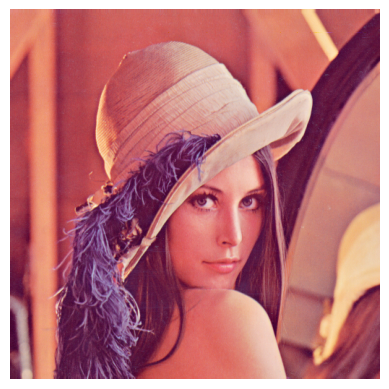

1. After adjust brightness


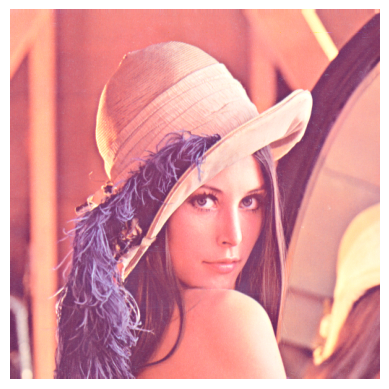

2. After adjust constrast


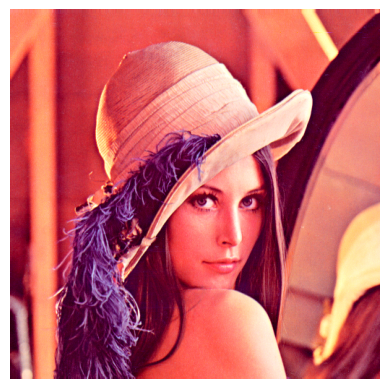

3. After flip image
a. Horizontal


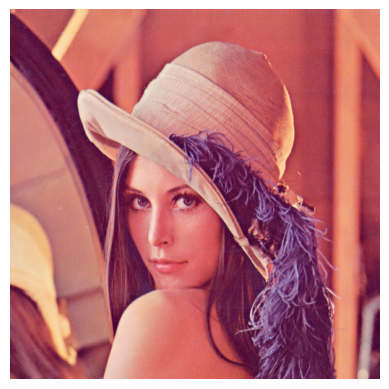

b. Vertical


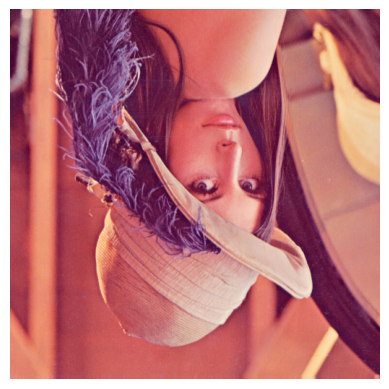

4. After convert image
a. Grayscale


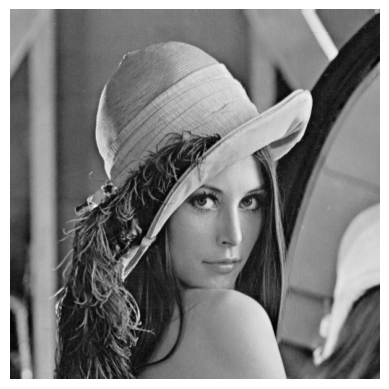

b. Sepia


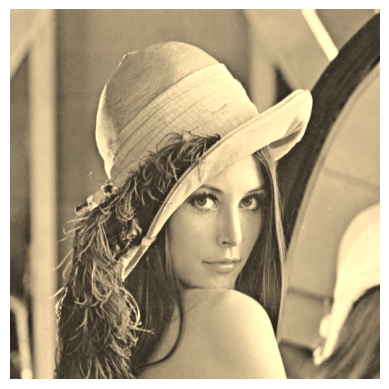

5. Apply blur and sharpen image
a. Blur


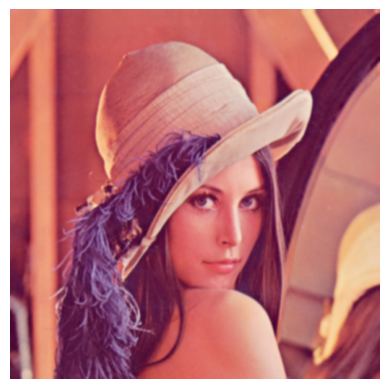

b. Sharpen


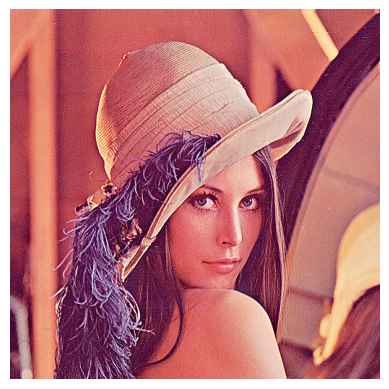

6. Crop image 1/4 from center


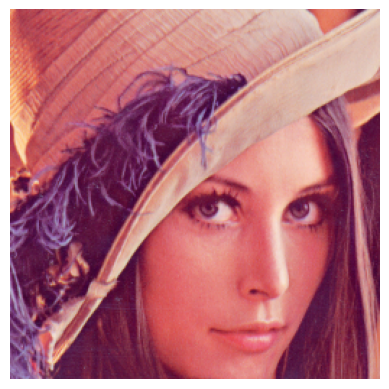

7. Crop image
a. Circle


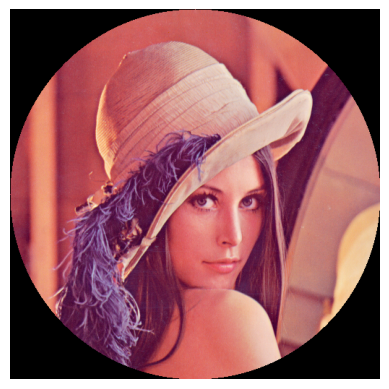

b. Ellip


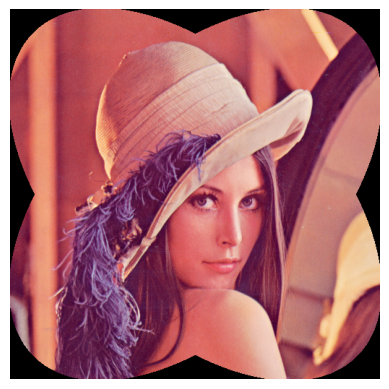

In [4]:
main()